In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer


In [2]:
data=load_breast_cancer()

In [5]:
type(data)

sklearn.utils._bunch.Bunch

In [8]:
#find different types of columns in the data
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
#find more details of the data
data['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [11]:
data['data'].shape

(569, 30)

In [17]:
#above data refers to the actual cancer data which is not data frame which we are looking for
dataFrame=pd.DataFrame(
    np.c_[data['data'],data['target']],
    columns=np.append(data['feature_names'],['target'])
    )

In [19]:
dataFrame.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [23]:
dataFrame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

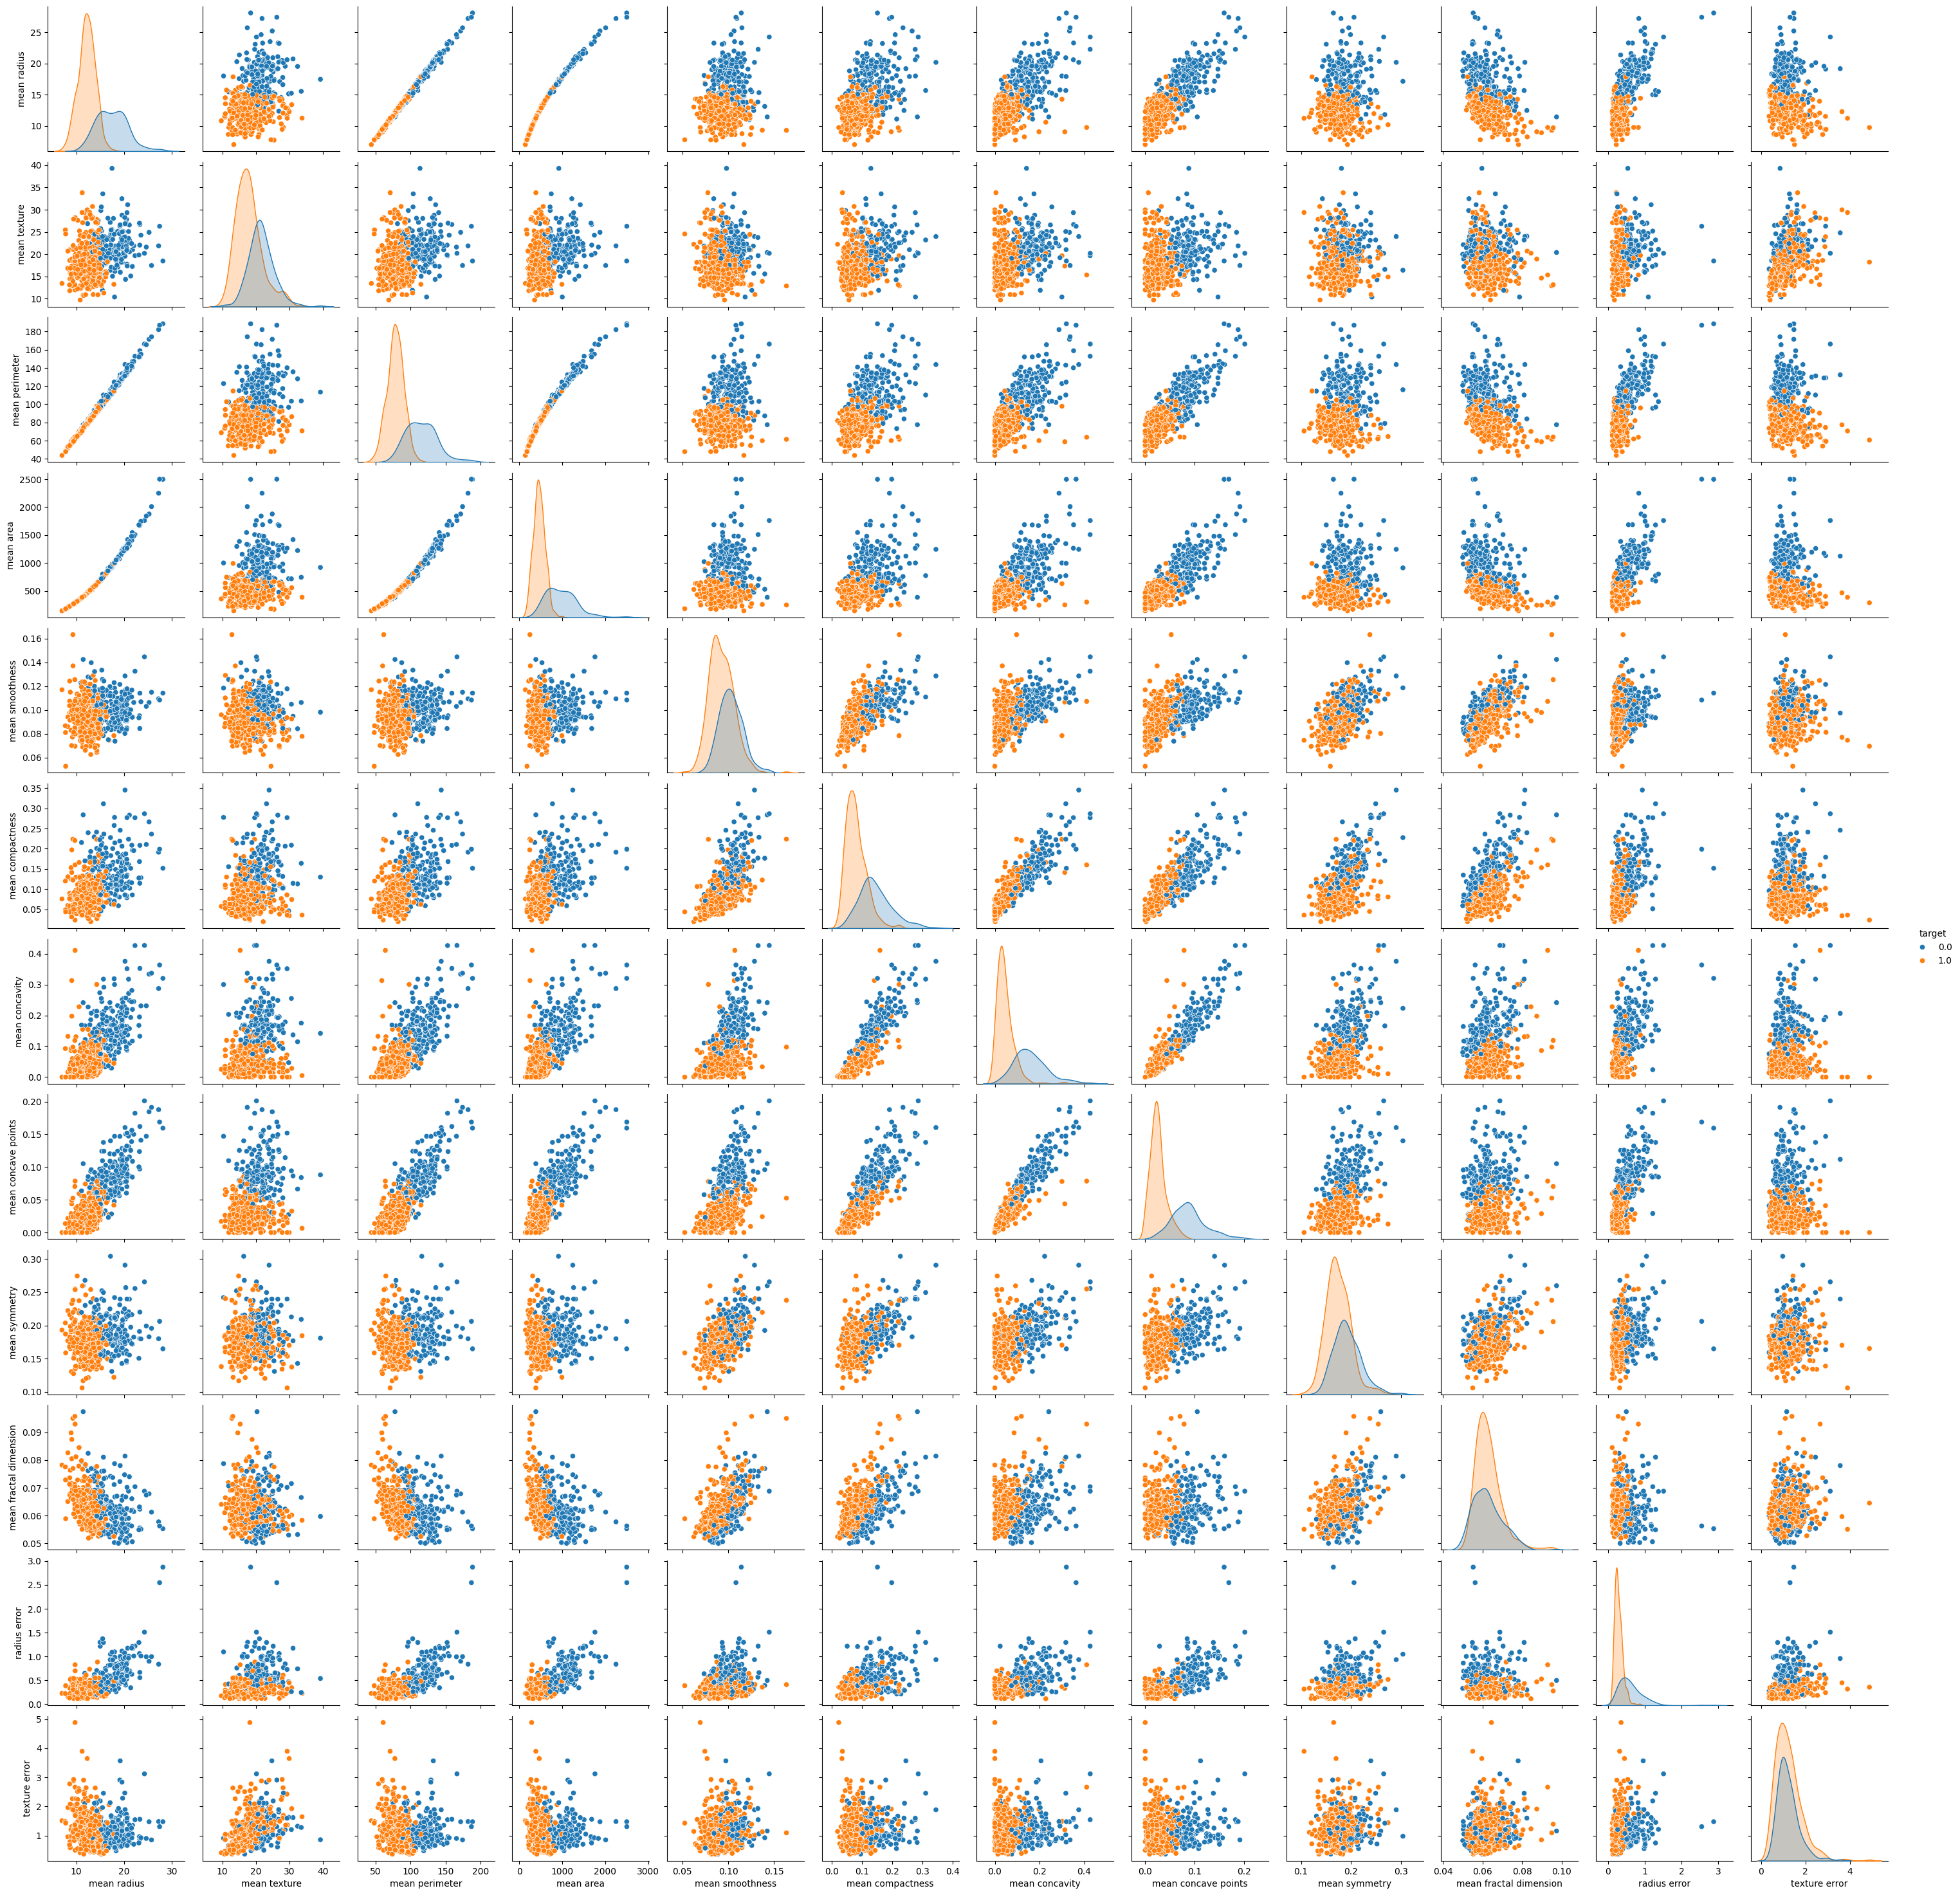

In [25]:
#Visualizing
sns.pairplot(
    dataFrame,
    hue='target',
    vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error']
)

In [24]:
dataFrame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<Axes: xlabel='target', ylabel='count'>

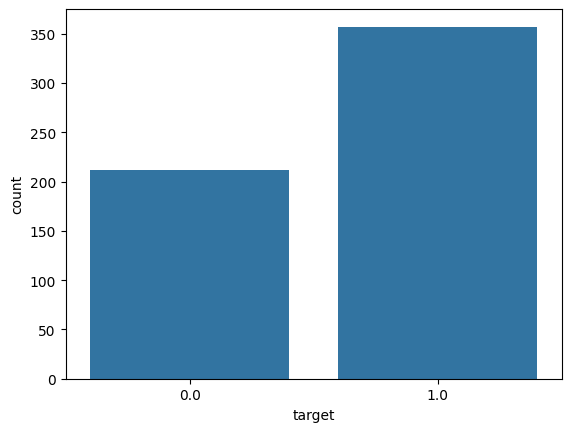

In [27]:
sns.countplot(x='target', data=dataFrame)

<Axes: >

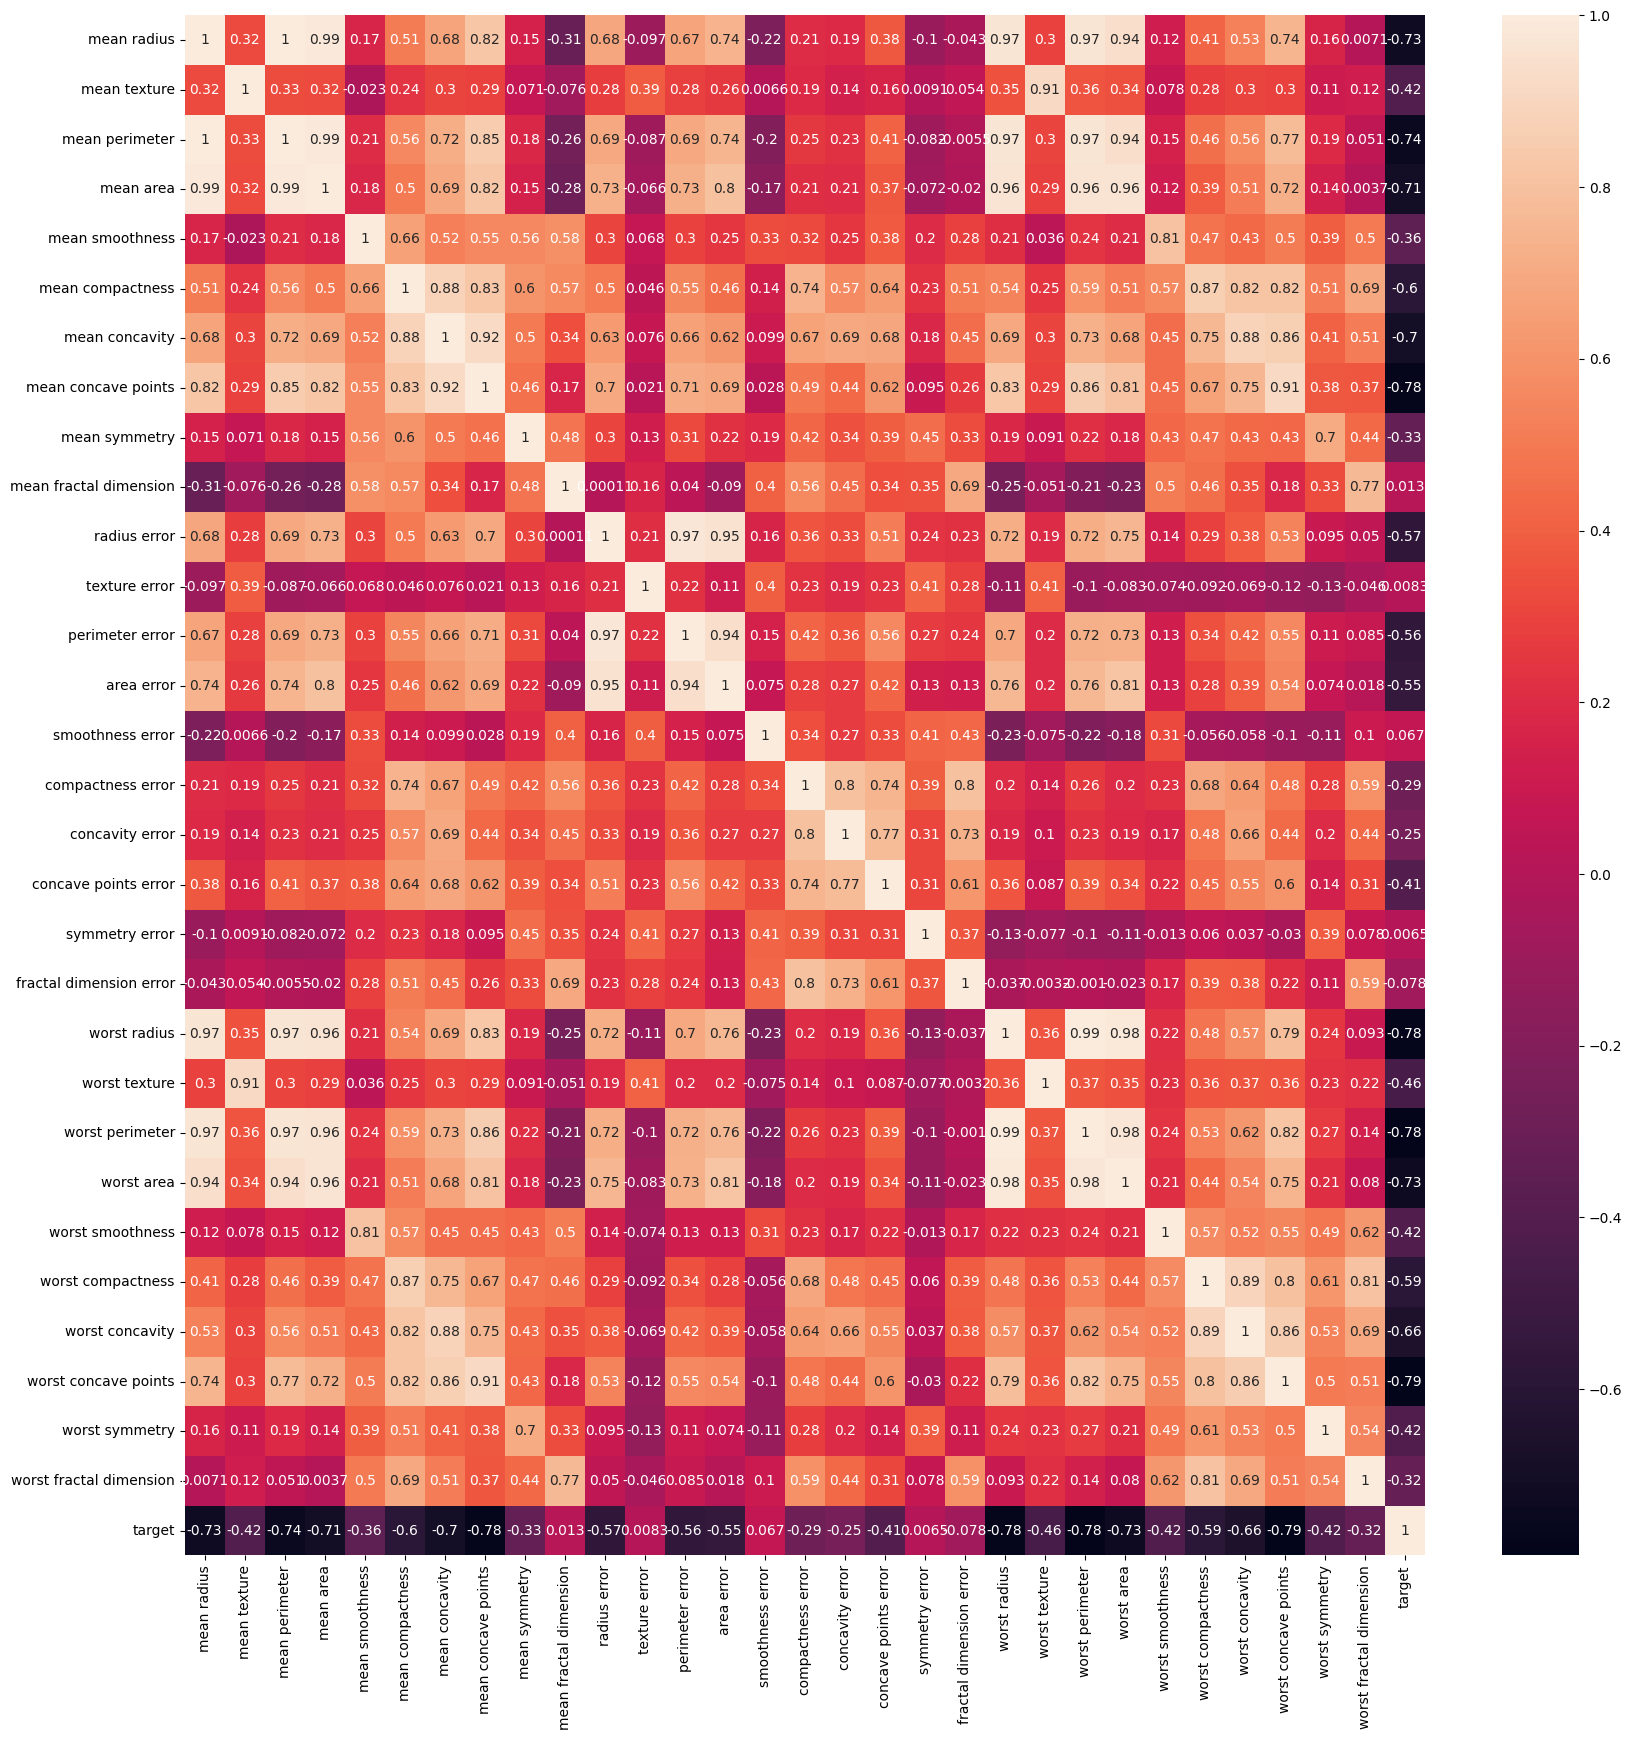

In [31]:
#heat map
plt.figure(figsize=(20,20))
sns.heatmap(dataFrame.corr(),annot=True)

In [32]:
#training the model
from sklearn.model_selection import train_test_split
from sklearn import svm

X=dataFrame.drop(columns=["target"],axis=1)
y=dataFrame["target"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [42]:
svc=svm.SVC()
svc.fit(x_train,y_train)

SVC()

In [43]:
predictions=svc.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is : ",accuracy_score(predictions,y_test)*100)

Accuracy is :  93.85964912280701


<Axes: >

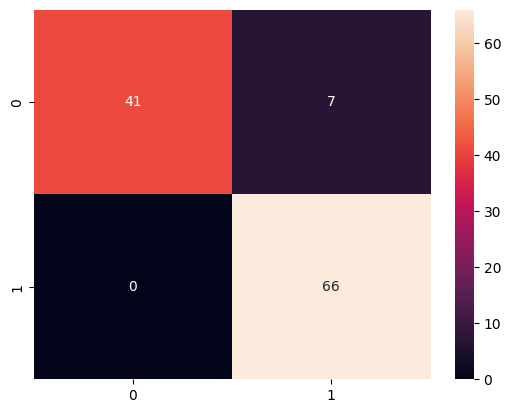

In [45]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [47]:
dataFrame.max()

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [ ]:
"""
Normalize this 
mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000

"""

'\nNormalize this \n\n'

In [52]:
from sklearn.preprocessing import StandardScaler

cols = ["mean area", "mean radius", "mean texture", "mean perimeter"]

scaler = StandardScaler()

dataFrame[cols] = scaler.fit_transform(dataFrame[cols])


In [53]:
dataFrame.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375          0.11840   
1     1.829821     -0.353632        1.685955   1.908708          0.08474   
2     1.579888      0.456187        1.566503   1.558884          0.10960   
3    -0.768909      0.253732       -0.592687  -0.764464          0.14250   
4     1.750297     -1.151816        1.776573   1.826229          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [58]:
from sklearn import svm
svc_normalised=svm.SVC()
X=dataFrame.drop(columns=["target"],axis=1)
y=dataFrame["target"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

svc_normalised.fit(x_train,y_train)


SVC()

Accuract after normalisation is : 94.73684210526315


<Axes: >

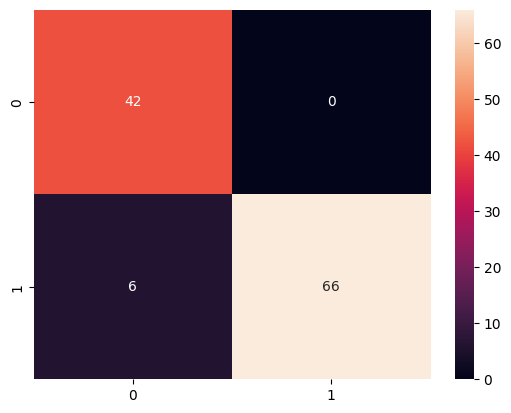

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred=svc_normalised.predict(x_test)

print("Accuract after normalisation is :",accuracy_score(y_pred,y_test)*100)

sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [ ]:
# with normalisation we have seen 1% increse in the accuracy and i think we can do it better wih adjust c parameter and g parater



 <h1>A higher C value makes the model aim for fewer misclassifications by using a smaller margin, while a lower C allows more misclassifications with a wider margin.</h1>



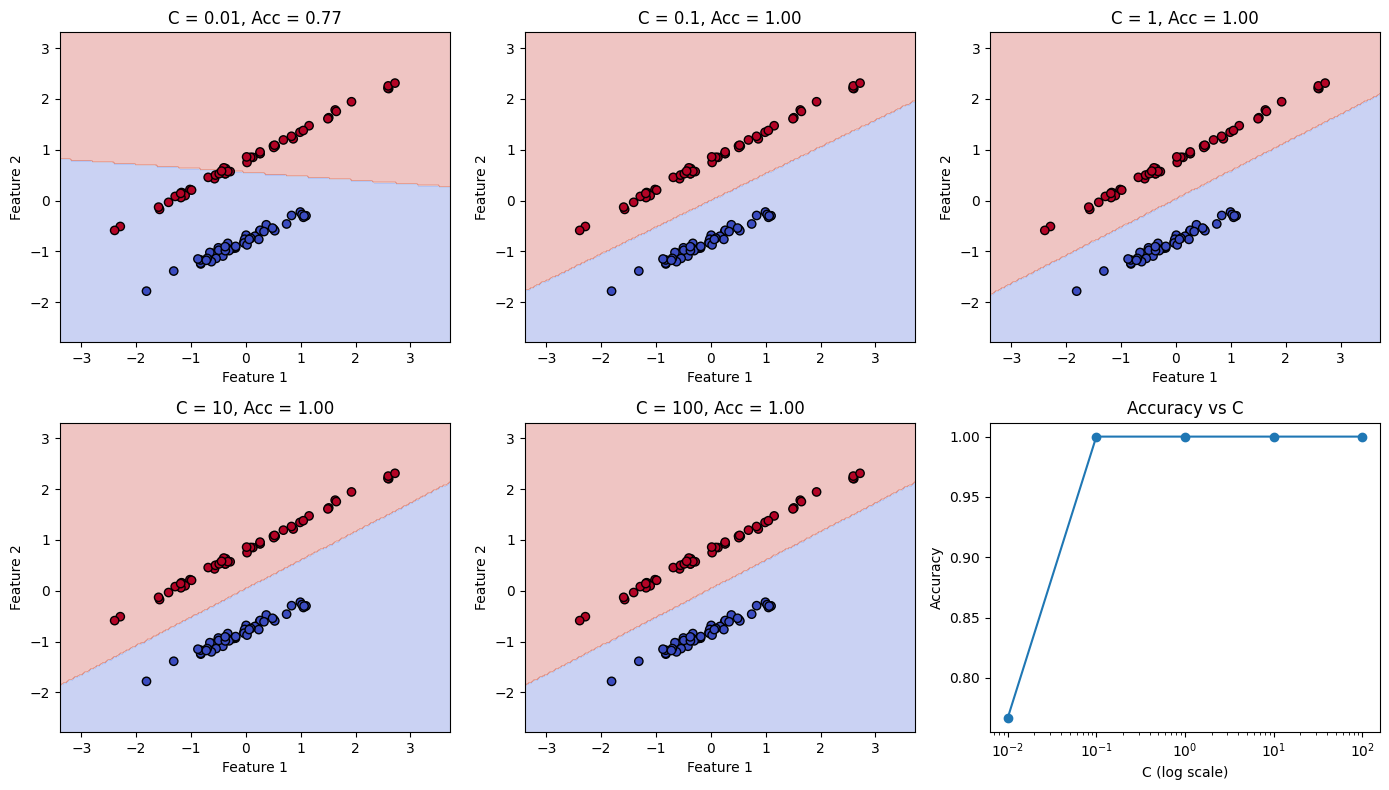

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate dataset with 2 features
X, y = datasets.make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# C values to test
C_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(14, 8))

accuracies = []

# Plot decision boundaries
for i, C in enumerate(C_values, 1):
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plt.subplot(2, 3, i)
    plt.title(f'C = {C}, Acc = {accuracy:.2f}')

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Plot accuracy vs C
plt.subplot(2, 3, 6)
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")

plt.tight_layout()
plt.show()
